# Filtering steps of top hits from TPP predictions on extremophiles dataset

We apply the following filtering steps:
- Use Squidly to predict AS
- Use Chai to dock TPP (unpositional docking)
- Use Vina to do positional docking of TPP

To do AS inference and docking we are using tools from enzyme-tk and therefore also need to be in the enzyme-tk environment. 


In [ ]:
# Load data

import os
import pandas as pd

os.chdir('/home/helen/cec_degrader/generalize/')
df = pd.read_pickle('TPPExtremophilePredictions/TPP_extremophile_predictions_EC3p1_hits.pkl')

## Use Squidly to predict active site residues

In [ ]:
from enzymetk.predict_catalyticsite_step import ActiveSitePred
from enzymetk.save_step import Save
import pandas as pd
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
#os.chdir("/home/helen/enzyme-tk/enzymetk" )

squidly_dir = '/home/helen/enzyme-tk/models/squidly_final_models/'
num_threads = 1
id_col = 'Entry'
seq_col = 'Sequence'

df << (ActiveSitePred(id_col, seq_col, squidly_dir, num_threads) >> Save('/home/helen/cec_degrader/generalize/FilteringPipeline/squidly_as_pred.pkl'))

In [ ]:
# Include results from active site prediction into df

df_squidly = pd.read_pickle('/home/helen/cec_degrader/generalize/SquidlyPredictions/squidly_as_pred.pkl')
df = pd.read_pickle('/home/helen/cec_degrader/generalize/TPPExtremophilePredictions/TPP_extremophile_predictions_EC3p1_hits.pkl')
df = pd.merge(df, df_squidly, left_on='Entry', right_on='label', how='left')
df.to_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/TPP_extremophile_predictions_EC3p1_hits_squidly.pkl')

## Do non-positional docking with Chai

In [ ]:
# Make df where substrate is always TPP. Because right now df contains substrate which had highest predicted 
# activity which is in some cases DPP. Because in the end, the desired enzymes need to also catalyze the first step
# this seems to make the most sense. 

df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/TPP_extremophile_predictions_EC3p1_hits_squidly.pkl')
df.loc[:, 'substrates'] = 'C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3'

# Requires the docko environment to be created
from enzymetk.dock_chai_step import Chai
from enzymetk.save_step import Save
import pandas as pd
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.chdir("/home/helen/enzyme-tk/enzymetk" )

output_dir = '/home/helen/cec_degrader/generalize/FilteringPipeline/ChaiPredictions'
num_threads = 1
id_col = 'Entry'
seq_col = 'Sequence'
substrate_col = 'substrates'

df << (Chai(id_col, seq_col, substrate_col, f'{output_dir}', num_threads) >> Save(f'{output_dir}.pkl'))

# Filtering for all screened variants so far (05/03)


In [ ]:
# Load data

import os
import pandas as pd

df = pd.read_pickle('/home/helen/cec_degrader/generalize/data/protein.pkl')
entries = [
    "QHH", "AXE2", "Q8ZXD8", "P95914", "O67466", "P95862", "Q06174", "Q978T4", 
    "Q72KH8", "O28020", "Q976X8", "Q97A76", "Q5JJC3", "Q96ZP3", "P23553", "Q97A76", 
    "P96084", "P46209", "Q60336", "Q5JJC3", "P81329", "Q57749", "P23553", "Q06174", 
    "P95862", "O28020", "Q976X8", "O67802", "Q9HLD5", "P95914", "O67153", "Q97YR6", 
    "O67466", "O35016", "O52787", "P0C5D3", "P26975", "P40289", "P49409", "P58596", 
    "P75525", "P9WIA0", "Q05918", "Q48451", "Q4L7Z6", "Q55535", "Q8CNQ1", "Q92G53", 
    "Q934J6", "Q9FAW5", "A6WFI5", "I6XU97", "L0TC47", "O31452", "O32232", "P37957", 
    "Q06174", "Q51758", "Q53547", "Q79F14", "Q93J06", "Q9HZY8", "D4Q9N1", "G9BY57", 
    "O53388", "P37957", "Q51718", "Q79F14", "Q93J06", "Q93MW7", "Q9ZKB5", "O25728", 
    "P39852", "P9WM39", "A0A0K2VM55", "D5EV35", "PETH2", "UYO"
]

df = df[df['Entry'].isin(entries)]


In [ ]:
# Squidly

# Run in enzymetk environement

from enzymetk.predict_catalyticsite_step import ActiveSitePred
from steps.save_step import Save
import pandas as pd
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.chdir("/home/helen/enzyme-tk/enzymetk" )

squidly_dir = '/home/helen/enzyme-tk/models/squidly_final_models/'
num_threads = 1
id_col = 'Entry'
seq_col = 'Sequence'
output_dir = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/'

#df << (ActiveSitePred(id_col, seq_col, squidly_dir, num_threads) >> Save(f'{output_dir}_squidly.pkl'))

# Include results from active site prediction into df
df_squidly = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Squidly.pkl')

df = pd.merge(df, df_squidly, left_on='Entry', right_on='label', how='left')
#df.to_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/screened_variants_squidly.pkl')

In [ ]:
# Chai

# Requires the docko environment to be created
from enzymetk.dock_chai_step import Chai
from enzymetk.save_step import Save
import pandas as pd
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.chdir("/home/helen/enzyme-tk/enzymetk" )

df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/screened_variants_squidly.pkl')
df.loc[:, 'substrates'] = 'C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3'

output_dir = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Chai'
num_threads = 1
id_col = 'Entry'
seq_col = 'Sequence'
substrate_col = 'substrates'

#df << (Chai(id_col, seq_col, substrate_col, f'{output_dir}', num_threads) >> Save(f'{output_dir}.pkl'))

In [ ]:
# Vina

# Run by Ariane because I still can't run it on my laptop. Only includes those for which catalytic residues were predicted by Squidly. 

import pandas as pd
from pathlib import Path

df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/screened_variants_squidly_chai_AF.pkl')
base_dir = Path("/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Vina/all_variants_with_squidly_annotation")

# Get path to vina file if exists
def get_vina_path(entry):
    path = base_dir / entry
    if path.is_dir() and any(path.iterdir()):  # Check folder exists AND is not empty
        return str(path)
    return None

# Create new column
df['vina_dir'] = df['Entry'].apply(get_vina_path)


df.to_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Vina.pkl')


In [ ]:
# Testig vina
# Run in docko environment
import sys
sys.path.append('/home/helen/enzyme-tk')
sys.path.append('/home/helen/enzyme-tk/enzymetk')
from enzymetk.dock_vina_step import Vina
from enzymetk.save_step import Save
import pandas as pd
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'

df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/screened_variants_squidly_chai_AF.pkl')
df = df.dropna(subset=['Squidly_CR_Position'])

df['substrate_name'] = 'TPP'
df['substrates'] = 'C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3'

output_dir = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Vina/'
num_threads = 1
id_col = 'Entry'
sequence_col = 'Sequence'
substrate_col = 'substrates'
df['structure'] = None # or path to AF structure
structure_col = 'structure' 
substrate_name_col = 'substrate_name'
active_site_col =  'Squidly_CR_Position' 


df << (Vina(id_col, structure_col, sequence_col, substrate_col, substrate_name_col, active_site_col, f'{output_dir}', num_threads)) #>> Save(f'{output_dir}Vina_predictions_test.pkl'))


In [ ]:
# AF3

# Got structures from AFDatabase until get AF3 structures from lucas.

import pandas as pd
import json
import os

df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/screened_variants.pkl')
df = df.head(1)

template = {
    "log_path": "/disk2/lukas/EnzymeOracle/data/af3/helen/af3_logging.txt",
    "af_input": "/disk2/lukas/EnzymeOracle/data/af3/helen/input",
    "af_output": "/disk2/lukas/EnzymeOracle/data/af3/helen/output",
    "MSA_tmp": "/disk2/lukas/EnzymeOracle/data/af3/helen/tmp",
    "device": 1,
    "ligand_smiles": "C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3",
    "cofactor_smiles": "",
    "targetDB": "/disk2/lukas/af3_mmseqs_scripts/dummy/DB_GPU/uniref90_conv",
    "mmseqs2_sensitivity": 1,
    "n_alignments": 100000
}

# Output directory
output_dir = "AF3"
os.makedirs(output_dir, exist_ok=True)

# Generate one JSON file per entry
for idx, row in df.iterrows():
    json_data = template.copy()
    json_data["protname"] = row["Entry"].upper().replace(" ", "")
    json_data["sequence"] = row["Sequence"]

    output_path = os.path.join(output_dir, f"{json_data['protname']}.json")
    with open(output_path, "w") as f:
        json.dump(json_data, f, indent=4)


In [ ]:
# PLACER

# Run in placer_env environment

from steps.PLACER_forVina_step import PLACER
from steps.cleanPDB_step import CleanPDB
from steps.save_step import Save
import pandas as pd
import os

os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Prepare pdb files (when running Placer with Chai files)
df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/screened_variants_squidly_chai.pkl')
df = df[df['chai_dir'].notnull()]

input_col = 'chai_dir'
output_dir = 'FilteringPipeline/ScreenedVariants/CleanPDB'

#df << (CleanPDB(input_col, output_dir, num_threads = 1) >> Save(f'{output_dir}_screened_variants.pkl'))

df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Vina_screend_variants.pkl')
df = df[df['vina_dir'].notnull()]
input_col = 'vina_dir'
output_dir = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer'

df << (PLACER(input_col, output_dir, ligand_name= 'TPHP', predict_ligand = 'L-LIG-1', num_threads = 1, nsamples = 10) >> Save(f'{output_dir}.pkl'))

In [2]:
# Superimpose structures

# run in enzymetk environment
from steps.superimposestructures_step import SuperimposeStructures
from steps.save_step import Save
import pandas as pd
import os

os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Mess because placer_env uses a different version of numpy
#df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer_screened_variants.pkl') # run in placer_env
#df.to_csv('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer_screened_variants.csv', index=False) # run in placer_env

df = pd.read_csv('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer_screened_variants2.csv') # run in enzymetk
#df = pd.read_csv('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Vina_screend_variants.csv') # run in enzymetk
#df2 = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/screened_variants_squidly_chai_AF.pkl')

df['chai_dir'] = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Chai/P96084'
df = df.head(1)

output_dir = 'FilteringPipeline/ScreenedVariants/Biotite'
vina_col = 'vina_dir'
chai_col = 'chai_dir'


df << (SuperimposeStructures(chai_col=chai_col, vina_col= vina_col, ligand_name= 'TPHP', output_dir = output_dir, num_threads = 1)  >> Save(f'{output_dir}.pkl'))



/home/helen/miniconda3/envs/enzymetk/lib/python3.11/site-packages/biotite/structure/io/pdbx/convert.py:435: UserWarning: Attribute 'auth_atom_id' not found within 'atom_site' category. The fallback attribute 'label_atom_id' will be used instead
  warnings.warn(


***
HET T       1  LIG O1     O         2.735    2.288   -4.264
HET T       1  LIG P1     P         2.835    0.809   -4.517
HET T       1  LIG O2     O         1.592   -0.042   -3.937
HET T       1  LIG C1     C         1.495   -1.399   -3.825
HET T       1  LIG C2     C         0.964   -2.245   -4.796
HET T       1  LIG C3     C         1.977   -1.935   -2.629
HET T       1  LIG C4     C         0.916   -3.623   -4.568
HET T       1  LIG C5     C         1.930   -3.311   -2.403
HET T       1  LIG C6     C         1.398   -4.156   -3.373
HET T       1  LIG O3     O         4.151    0.116   -3.889
HET T       1  LIG C7     C         5.187    0.789   -3.306
HET T       1  LIG C8     C         6.466    0.386   -3.691
HET T       1  LIG C9     C         5.032    1.820   -2.382
HET T       1  LIG C10    C         7.592    1.007   -3.148
HET T       1  LIG C11    C         6.161    2.441   -1.839
HET T       1  LIG C12    C         7.438    2.035   -2.221
HET T       1  LIG O4     O         

,id,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Taxonomic lineage (Ids),Taxonomic lineage,...,substrate_unimol_repr,rxnfp,label,Squidly_CR_Position,Squidly_CR_probabilities,Squidly_CR_representations,vina_dir,placer_dir,chai_dir,superimposedstructure_dir
0,P96084_DEHP->MEHP,P96084,reviewed,PIP_THEAC,Proline iminopeptidase (PIP) (EC 3.4.11.5) (Pr...,pip Ta0830,Thermoplasma acidophilum (strain ATCC 25905 / ...,293,"131567 (no rank), 2157 (superkingdom), 2283796...","cellular organisms (no rank), Archaea (superki...",...,[-3.84054804e+00 1.40712509e+01 -1.79958382e+...,"[-1.7030971050262451, -0.2196575254201889, 0.0...",P96084,104|243|270,0.99917823|0.9994017|0.999343,[[-0.83636904 -0.3140825 -1.0214647 -1.01312...,/home/helen/cec_degrader/generalize/FilteringP...,['/home/helen/cec_degrader/generalize/Filterin...,/home/helen/cec_degrader/generalize/FilteringP...,None


In [ ]:
# Prepare placer df

# Mess because placer_env uses a different version of numpy
#df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer_screened_variants.pkl') # run in placer_env
#df.to_csv('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer_screened_variants2.csv', index=False) # run in placer_env




In [ ]:
# Superimpose structures 

from pathlib import Path
import os
import pandas as pd
from pathlib import Path
import logging
from multiprocessing.dummy import Pool as ThreadPool
import numpy as np
from step import Step
import tempfile
import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.structure.io.pdbx as pdbx
import biotite.structure.io.pdb as pdb
import biotite.structure.io.pdbqt as pdbqt


def extract_ligand(structure):
    # Apply filters: select non-amino acids and non-solvents (ligands)
    is_ligand = ~struc.filter_amino_acids(structure) & ~struc.filter_solvent(structure)
    
    # Return only the ligand atoms from the structure
    return structure[is_ligand]

def extract_monomer(complex):
    complex = complex[struc.filter_amino_acids(complex)]
    # Get the monomer that belongs to the first atom in the structure
    return complex[struc.get_chain_masks(complex, [0])[0]]

def clean_vina_ligand_file(file_path):
    """
    Removes the first line and the line immediately following any 'ENDMDL' in a PDBQT file.
    
    Parameters:
    file_path (str): The path to the PDBQT file to process.
    
    Returns:
    list: A list of filtered lines after processing.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # List to store the filtered lines
    filtered_lines = []

    # Flag to track if the next line should be skipped
    skip_next_line = False

    # Skip the very first line (index 0)
    start_index = 1

    # Iterate through each line in the PDBQT file starting from the second line
    for i, line in enumerate(lines[start_index:], start=start_index):
        if skip_next_line:
            # Skip the line after ENDMDL
            skip_next_line = False
            continue  # Skip this line
        
        # If the current line is ENDMDL, set flag to skip the next line
        if line.startswith('ENDMDL'):
            filtered_lines.append(line)  # Keep the ENDMDL line
            skip_next_line = True  # Skip the next line
            continue  # Skip adding the next line here
        
        # Add all other lines to the filtered list
        filtered_lines.append(line)

    return filtered_lines


df = pd.read_csv('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer_screened_variants2.csv') # run in enzymetk


output_dir = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Biotite'
vina_col = 'vina_dir'
chai_col = 'chai_dir'
chai_path = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Chai/P96084/chai/P96084_1.cif'
vina_path = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Vina/tmp/P96084/P96084.pdb'
vina_ligand_path = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Vina/tmp/P96084/P96084-TPHP.pdb'
placer_path = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Placer/P96084_AF2/P96084_AF2_withligand_model.pdb'
AF3_path = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/AF3'

# Read in PDB and mCif files
chai = pdbx.CIFFile.read(chai_path)
vina = pdb.PDBFile.read(vina_path)
placer= pdb.PDBFile.read(placer_path)
vina_ligand_cleaned = clean_vina_ligand_file(vina_ligand_path)

# Write cleaned content to a temporary file in text mode
with tempfile.NamedTemporaryFile(mode='w', delete=False, encoding='utf-8') as tmpfile:
    tmpfile.writelines(vina_ligand_cleaned)
    tmpfile_path = tmpfile.name

# Now read the cleaned file using PDBFile.read()
vina_ligand_pdb_file = pdb.PDBFile.read(tmpfile_path)
vina_ligand_structure = vina_ligand_pdb_file.get_structure()

# Read protein structures
chai_structure = pdbx.get_structure(chai, model=1)
vina_structure = pdb.get_structure(vina, model=1)
placer_structure = pdb.get_structure(placer, model=1)

# Extract ligands 
chai_ligand_structure = extract_ligand(chai_structure)
placer_ligand_structure = extract_ligand(placer_structure)

# Extract structures
chai_structure = extract_monomer(chai_structure)
vina_structure = extract_monomer(vina_structure)
placer_structure = extract_monomer(placer_structure)
#AF3_structure = extract_monomer(pdb.get_structure(AF3, model=1, include_bonds=True))

# Align vina to chai
vina_aligned, transform, _, _ = struc.superimpose_homologs(chai_structure, vina_structure)
placer_aligned, _, _, _ = struc.superimpose_homologs(chai_structure, placer_structure)

# Apply transformation to vina ligand
aligned_models = []
for model in vina_ligand_structure:
    aligned = transform.apply(model)
    aligned_models.append(aligned)

vina_ligand_aligned = struc.stack(aligned_models) # Combine aligned models into a single AtomArrayStack

# After alignment, assign unique chain IDs
chai_structure.chain_id[:] = "A"
vina_aligned.chain_id[:] = "B"
placer_aligned.chain_id[:] = "C"
chai_ligand_structure.chain_id[:] = "T"
vina_ligand_aligned.chain_id[:] = "V"
placer_ligand_structure.chain_id[:] = 'P'
#AF3_aligned.chain_id[:] = "D"

depth = vina_ligand_aligned.stack_depth()

chai_structure_stack = struc.stack([chai_structure] * depth)
placer_structure_stack = struc.stack([placer_aligned] * depth)
vina_aligned_stack = struc.stack([vina_aligned] * depth)
chai_ligand_stack = struc.stack([chai_ligand_structure] * depth)
placer_ligand_stack = struc.stack([placer_ligand_structure] * depth)
#print(placer_ligand_stack)

combined = struc.concatenate([
    chai_structure_stack, #vina_aligned_stack, 
    placer_structure_stack, 
    chai_ligand_stack, #vina_ligand_aligned, 
    placer_ligand_stack
])


def truncate_atom_names(structure):
    # Truncate atom names to the first 4 characters
    structure.atom_name = [atom[:4] for atom in structure.atom_name]
    return structure

def truncate_residue_names(structure):
    structure.res_name = [res[:3] for res in structure.res_name]  # Truncate to 3 characters
    return structure

# After extracting ligands and combining structures
combined_structure = truncate_residue_names(combined)
combined_structure = truncate_atom_names(combined_structure)

output_filename = Path(output_dir) / f"superimposed_with_placer.pdb"
pdb_file = pdb.PDBFile()
pdb_file.set_structure(combined_structure)
pdb_file.write(str(output_filename))

# Align placer structure to chai 
#placer_aligned, _, _, _ = struc.superimpose_homologs(chai_structure, placer_structure)
# Align AF3 structure to chai
#AF3_aligned, _, _, _ = struc.superimpose_homologs(chai_structure, AF3_structure)



In [ ]:
# For placer need to do manual superimposition because otherwise doesn't work



# 1. Get common residues
placer_residues = get_residue_ids(placer_structure)
vina_residues = get_residue_ids(vina_structure)
common_residues = placer_residues & vina_residues

# 2. Select only CA atoms from common residues
placer_ca = placer_structure[(placer_structure.atom_name == "CA") &
                             [rid in common_residues for rid in zip(placer_structure.res_id, placer_structure.ins_code)]]

vina_ca = vina_structure[(vina_structure.atom_name == "CA") &
                         [rid in common_residues for rid in zip(vina_structure.res_id, vina_structure.ins_code)]]

In [ ]:
# Ensure same length for alignment
min_len = min(len(placer_ca), len(vina_ca))
placer_ca = placer_ca[:min_len]
vina_ca = vina_ca[:min_len]


# Compute rotation and translation
placer_aligned, _= struc.superimpose(vina_ca, placer_ca)

# Assign unique chain IDs
vina_structure.chain_id[:] = "A"
placer_aligned.chain_id[:] = "B"

# Combine both into one AtomArray
combined = struc.concatenate([vina_structure, placer_aligned])

# Write to PDB
output_filename = Path(output_dir) / f"superimposed_with_placer3.pdb"
pdb_file = pdb.PDBFile()
pdb_file.set_structure(combined)
pdb_file.write(output_filename)


In [17]:
df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Biotite.pkl')
df.superimposedstructure_dir[0]

PosixPath('FilteringPipeline/ScreenedVariants/Biotite/vina_ligand7.pdb')

In [14]:
import numpy as np
import biotite.structure as struc
import biotite.structure.io.pdb as pdb
from biotite.structure.io.pdb import PDBFile
from spyrmsd import rmsd
from pathlib import Path
from scipy.spatial.distance import cdist  
#from biotite.structure.info import element_to_atomic_number


element_to_atomic_number = {
    "H": 1, "He": 2, "Li": 3, "Be": 4, "B": 5, "C": 6, "N": 7, "O": 8, "F": 9, "Ne": 10,
    "Na": 11, "Mg": 12, "Al": 13, "Si": 14, "P": 15, "S": 16, "Cl": 17, "Ar": 18, "K": 19,
    "Ca": 20, "Sc": 21, "Ti": 22, "V": 23, "Cr": 24, "Mn": 25, "Fe": 26, "Co": 27, "Ni": 28,
    "Cu": 29, "Zn": 30, "Ga": 31, "Ge": 32, "As": 33, "Se": 34, "Br": 35, "Kr": 36, "Rb": 37,
    "Sr": 38, "Y": 39, "Zr": 40, "Nb": 41, "Mo": 42, "Tc": 43, "Ru": 44, "Rh": 45, "Pd": 46,
    "Ag": 47, "Cd": 48, "In": 49, "Sn": 50, "Sb": 51, "I": 53, "Xe": 54, "Cs": 55, "Ba": 56,
    "La": 57, "Ce": 58, "Pr": 59, "Nd": 60, "Pm": 61, "Sm": 62, "Eu": 63, "Gd": 64, "Tb": 65,
    "Dy": 66, "Ho": 67, "Er": 68, "Tm": 69, "Yb": 70, "Lu": 71, "Hf": 72, "Ta": 73, "W": 74,
    "Re": 75, "Os": 76, "Ir": 77, "Pt": 78, "Au": 79, "Hg": 80, "Tl": 81, "Pb": 82, "Bi": 83,
    "Th": 90, "Pa": 91, "U": 92
}

def extract_two_ligands_from_pdb(pdb_path):
    with open(pdb_path, 'r') as f:
        pdb_file = pdb.PDBFile.read(f)
    structure = pdb.get_structure(pdb_file, model=1)

    is_ligand = ~struc.filter_amino_acids(structure) & ~struc.filter_solvent(structure)
    ligands = structure[is_ligand]
    
    ligand_list = []
    for chain_id in set(ligands.chain_id):
        chain_lig = ligands[ligands.chain_id == chain_id]
        ligand_list.append(chain_lig)

    if len(ligand_list) != 2:
        raise ValueError("Expected exactly 2 ligands, found: {}".format(len(ligand_list)))
    return ligand_list[0], ligand_list[1]

# Function to calculate adjacency matrix from coordinates and atomic numbers
def calculate_adjacency_matrix(coords, threshold=2.0):
    # Calculate pairwise distances between atoms
    distances = cdist(coords, coords)
    
    # Create the adjacency matrix where distances below threshold indicate bonds
    adjacency_matrix = (distances < threshold) & (distances > 0)  # Avoid self-bonds
    return adjacency_matrix.astype(int)  # Convert to integer (0 or 1)


def prepare_for_symmrmsd(ligand):
    coords = struc.coord(ligand)
    atomic_nums = np.array([element_to_atomic_number[el] for el in ligand.element])
    #adjacency = rmsd.adjacency_matrix(coords, atomic_nums)
    adjacency = calculate_adjacency_matrix(coords)  # Create the adjacency matrix
    return coords, atomic_nums, adjacency


# === Main execution ===
pdb_path = Path("/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Biotite/P96084_1__vina_ligand1.pdb")
ligand_a, ligand_b = extract_two_ligands_from_pdb(pdb_path)

coords_a, atomic_nums_a, adj_a = prepare_for_symmrmsd(ligand_a)
coords_b, atomic_nums_b, adj_b = prepare_for_symmrmsd(ligand_b)

symm_rmsd_value = rmsd.symmrmsd(
    coordsref=coords_a,                 # Reference coordinated
    coords=coords_b,                    # Coordinates (one set or multiple sets)
    apropsref=atomic_nums_a,            # Reference atomic properties
    aprops=atomic_nums_b,               # Atomic properties
    amref=adj_a,                        # Reference adjacency matrix
    am=adj_b,                           # Adjacency matrix
    center=False,                       # Flag to center molecules at origin
    minimize=False                      # Flag to compute minimum RMSD
)


print(f"Symmetry-corrected RMSD: {symm_rmsd_value:.3f} Å")


Symmetry-corrected RMSD: 3.822 Å


In [ ]:
# Calculate LigandRMSD

# run in enzymetk environment
from steps.computeligandRMSD_step import LigandRMSD
from steps.fpocket_step import Fpocket
from steps.save_step import Save
import pandas as pd
import os

os.environ['MKL_THREADING_LAYER'] = 'GNU'

df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Biotite.pkl')
df = df.head(1)

output_dir = 'FilteringPipeline/ScreenedVariants/LigandRMSD'
pdb_col = 'superimposedstructure_dir'
df['pdb_file'] = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/Biotite/P96084'
num_threads = 1

df << (LigandRMSD('pdb_file', output_dir = output_dir, num_threads = 1)  >> Save(f'{output_dir}test.pkl'))

,id,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Taxonomic lineage (Ids),Taxonomic lineage,...,label,Squidly_CR_Position,Squidly_CR_probabilities,Squidly_CR_representations,vina_dir,placer_dir,chai_dir,superimposedstructure_dir,pdb_file,ligandRMSD_dir
0,P96084_DEHP->MEHP,P96084,reviewed,PIP_THEAC,Proline iminopeptidase (PIP) (EC 3.4.11.5) (Pr...,pip Ta0830,Thermoplasma acidophilum (strain ATCC 25905 / ...,293,"131567 (no rank), 2157 (superkingdom), 2283796...","cellular organisms (no rank), Archaea (superki...",...,P96084,104|243|270,0.99917823|0.9994017|0.999343,[[-0.83636904 -0.3140825 -1.0214647 -1.01312...,/home/helen/cec_degrader/generalize/FilteringP...,['/home/helen/cec_degrader/generalize/Filterin...,/home/helen/cec_degrader/generalize/FilteringP...,None,/home/helen/cec_degrader/generalize/FilteringP...,FilteringPipeline/ScreenedVariants/LigandRMSD/...


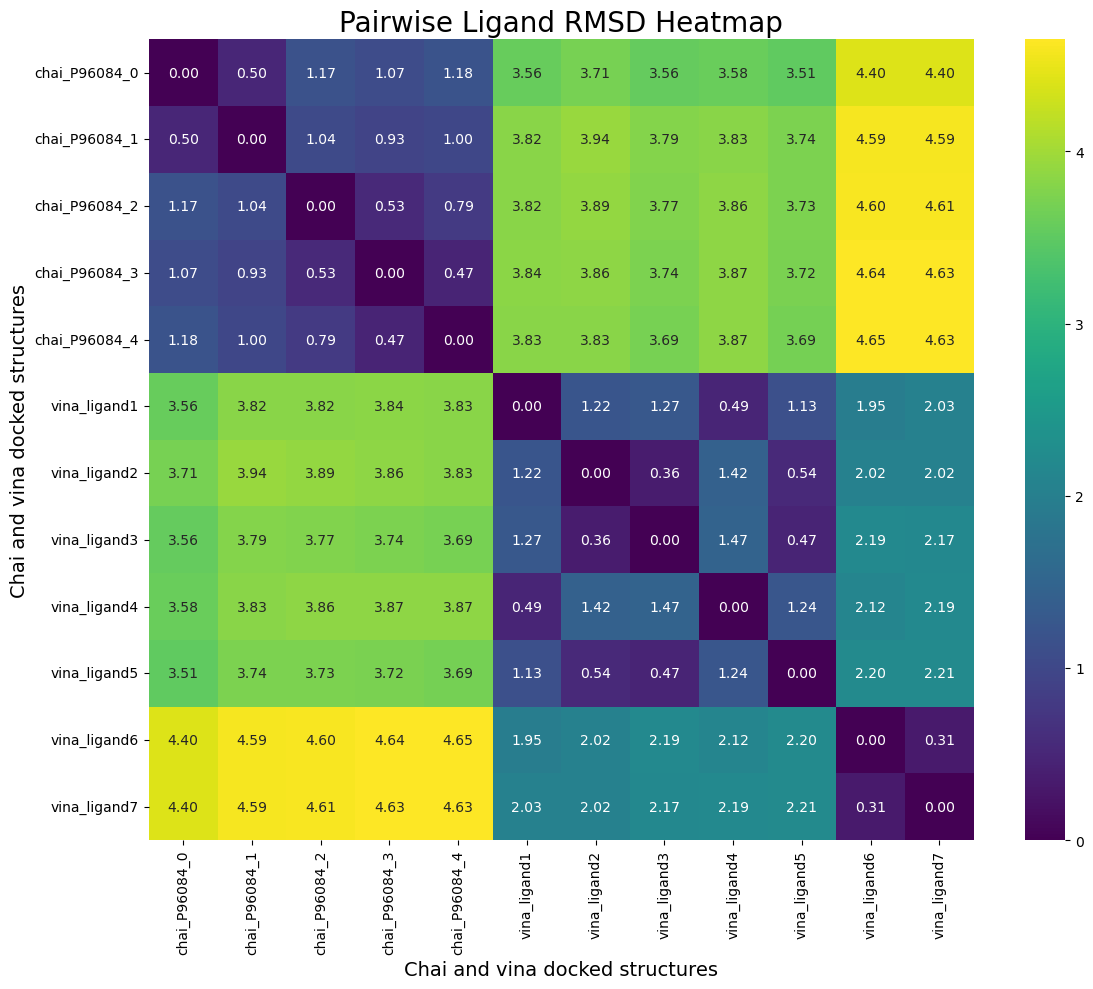

Heatmap saved to test_heatmap.png


In [16]:
# Visualize ligand RMSD
csv = '/home/helen/cec_degrader/generalize/FilteringPipeline/ScreenedVariants/LigandRMSD/ligand_rmsd_results.csv' # run in enzymetk


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_rmsd_from_csv(csv_path, output_png="ligand_rmsd_heatmap.png"):
    """Visualizes pairwise ligand RMSDs from a CSV file as a heatmap."""
    try:
        df = pd.read_csv(csv_path)

        # Assuming your CSV has 'ligand1', 'ligand2', and 'rmsd' columns
        if not all(col in df.columns for col in ['docked_structure1', 'docked_structure2', 'ligand_rmsd']):
            raise ValueError("CSV file must contain columns: 'docked_structure1', 'docked_structure2', 'ligand_rmsd'")

        ligands = sorted(list(set(df['docked_structure1'].unique()) | set(df['docked_structure2'].unique())))
        num_ligands = len(ligands)
        rmsd_matrix = pd.DataFrame(np.zeros((num_ligands, num_ligands)), index=ligands, columns=ligands)

        for index, row in df.iterrows():
            ligand1 = row['docked_structure1']
            ligand2 = row['docked_structure2']
            rmsd_value = row['ligand_rmsd']
            rmsd_matrix.loc[ligand1, ligand2] = rmsd_value
            rmsd_matrix.loc[ligand2, ligand1] = rmsd_value  # Heatmap is symmetric

        plt.figure(figsize=(10, 8))
        sns.heatmap(rmsd_matrix, annot=True, cmap="viridis", fmt=".2f")
        plt.title("Pairwise Ligand RMSD Heatmap")
        plt.xlabel("Ligands")
        plt.ylabel("Ligands")
        plt.tight_layout()
        plt.savefig(output_png)
        plt.show()
        print(f"Heatmap saved to {output_png}")

    except FileNotFoundError:
        print(f"Error: CSV file not found at {csv_path}")
    except ValueError as ve:
        print(f"Error in CSV format: {ve}")
    except Exception as e:
        print(f"Error creating heatmap: {e}")


def visualize_rmsd_from_csv(csv_path, output_png="ligand_rmsd_heatmap.png"):
    """Visualizes pairwise ligand RMSDs from a CSV file as a heatmap."""
    try:
        df = pd.read_csv(csv_path)

        # Assuming your CSV has 'docked_structure1', 'docked_structure2', and 'ligand_rmsd' columns
        if not all(col in df.columns for col in ['docked_structure1', 'docked_structure2', 'ligand_rmsd']):
            raise ValueError("CSV file must contain columns: 'docked_structure1', 'docked_structure2', 'ligand_rmsd'")

        ligands = sorted(list(set(df['docked_structure1'].unique()) | set(df['docked_structure2'].unique())))
        num_ligands = len(ligands)
        rmsd_matrix = pd.DataFrame(np.zeros((num_ligands, num_ligands)), index=ligands, columns=ligands)

        for index, row in df.iterrows():
            ligand1 = row['docked_structure1']
            ligand2 = row['docked_structure2']
            rmsd_value = row['ligand_rmsd']
            rmsd_matrix.loc[ligand1, ligand2] = rmsd_value
            rmsd_matrix.loc[ligand2, ligand1] = rmsd_value  # Heatmap is symmetric

        plt.figure(figsize=(12, 10))  # Make the figure larger
        sns.heatmap(rmsd_matrix, annot=True, cmap="viridis", fmt=".2f")
        plt.title("Pairwise Ligand RMSD Heatmap", fontsize=20)  # Larger title
        plt.xlabel("Chai and vina docked structures", fontsize=14)
        plt.ylabel("Chai and vina docked structures", fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.savefig(output_png)
        plt.show()
        print(f"Heatmap saved to {output_png}")

    except FileNotFoundError:
        print(f"Error: CSV file not found at {csv_path}")
    except ValueError as ve:
        print(f"Error in CSV format: {ve}")
    except Exception as e:
        print(f"Error creating heatmap: {e}")


visualize_rmsd_from_csv(csv, "test_heatmap.png")




In [ ]:
# Benchmark comparison with e.g. GTPase









In [ ]:
# Select matching atoms (example: C-alpha atoms)
chai_ca = chai_structure[struc.filter_calpha(chai_structure)]
vina_ca = vina_structure[struc.filter_calpha(vina_structure)]

# Ensure same length for alignment
min_len = min(len(chai_ca), len(vina_ca))
chai_ca = chai_ca[:min_len]
vina_ca = vina_ca[:min_len]

# Compute transformation
transformation = struc.superimpose(chai_ca, vina_ca)

# Apply transformation to vina
vina_aligned = vina_structure.copy()
vina_aligned = transformation.transform(vina_aligned)


## Finding binding pockets and calculate binding pocket area

In [ ]:
from steps.fpocket_step import Fpocket
from steps.save_step import Save
import pandas as pd
import os

# Run in enzymetk environment

df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/TPP_extremophile_predictions_EC3p1_hits_squidly.pkl')
alphafold_dir = '/home/helen/cec_degrader/generalize/alphafold_structures'
variant_name_col = 'Entry' 

def get_structure_path(variant_name):
    filename = f"{variant_name}_structure.pdb"
    filepath = os.path.join(alphafold_dir, filename)
    if os.path.exists(filepath):
        return filepath
    else:
        return None  

df['AF_structure'] = df[variant_name_col].apply(get_structure_path)

output_dir = '/home/helen/cec_degrader/generalize/FilteringPipeline/fpocketPredictions'
pdb_col = 'AF_structure'

df << (Fpocket(pdb_col, output_dir) >> Save(f'{output_dir}test.pkl'))

In [ ]:
df = pd.read_pickle('/home/helen/cec_degrader/generalize/FilteringPipeline/fpocketPredictionstest.pkl')
df.fpocket_dir[0]